In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
data = pd.read_csv('housing.csv')

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
data.isna().sum().sum()

0

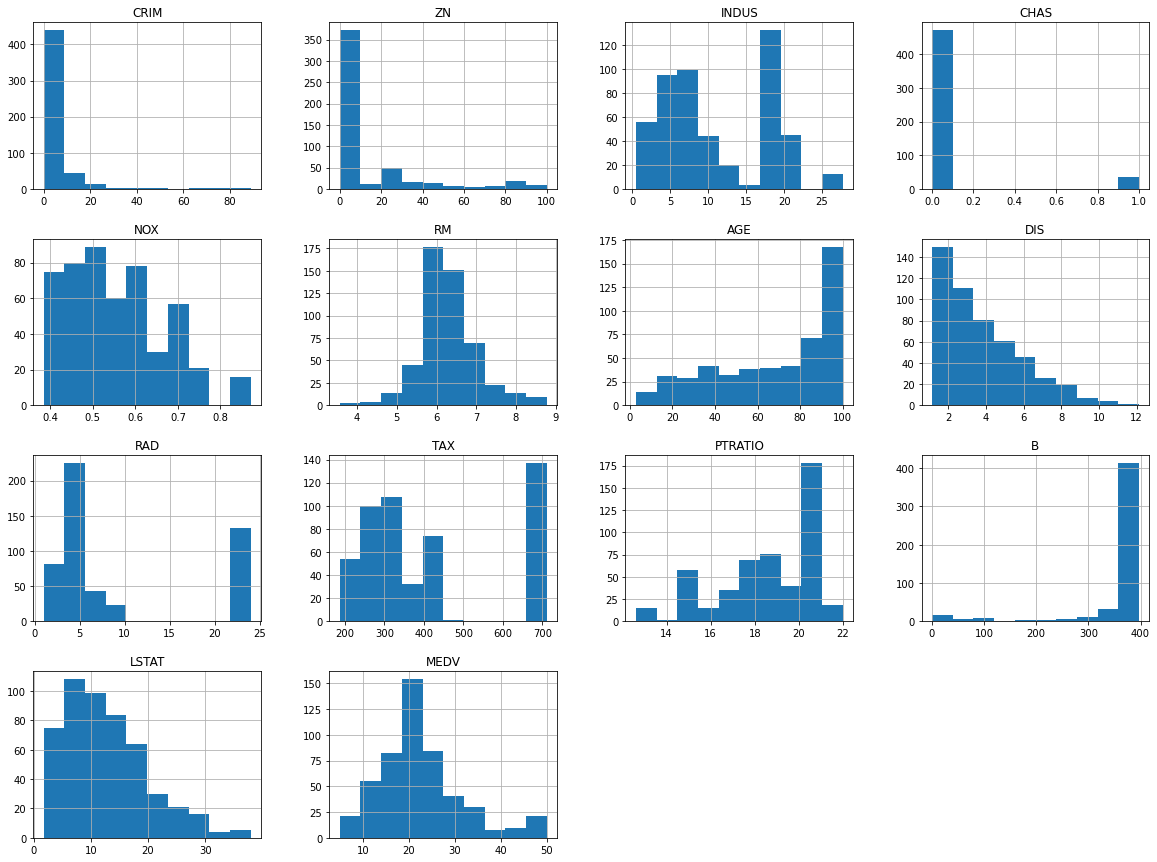

In [22]:
data.hist(figsize=(20,15));

In [26]:
c = data.corr()['MEDV'].sort_values(key=lambda x: abs(x), ascending=False)
c

MEDV       1.000000
LSTAT     -0.737663
RM         0.695360
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

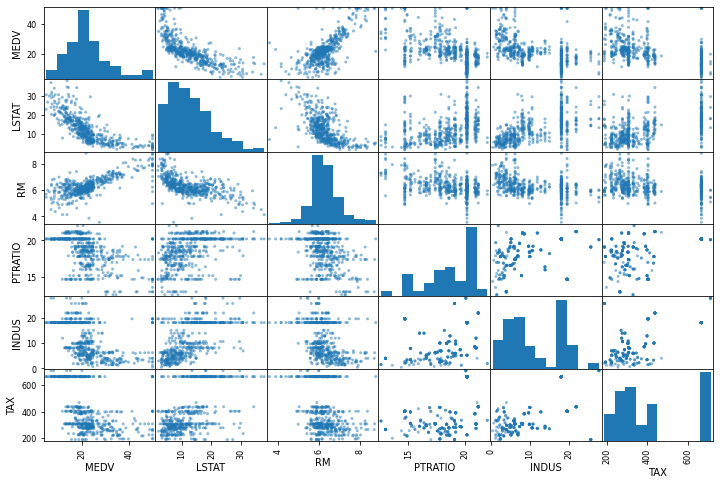

In [28]:
from pandas.plotting import scatter_matrix

scatter_matrix(data[c.index[:6]], figsize=(12, 8));

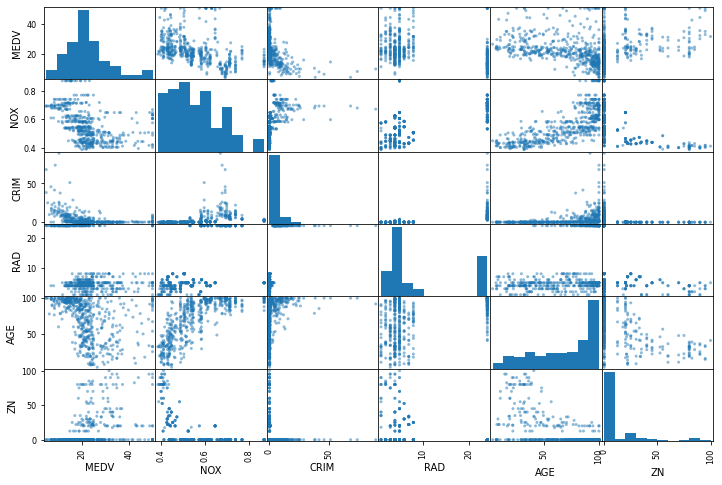

In [34]:
scatter_matrix(data[['MEDV', 'NOX', 'CRIM', 'RAD', 'AGE', 'ZN']], figsize=(12, 8));

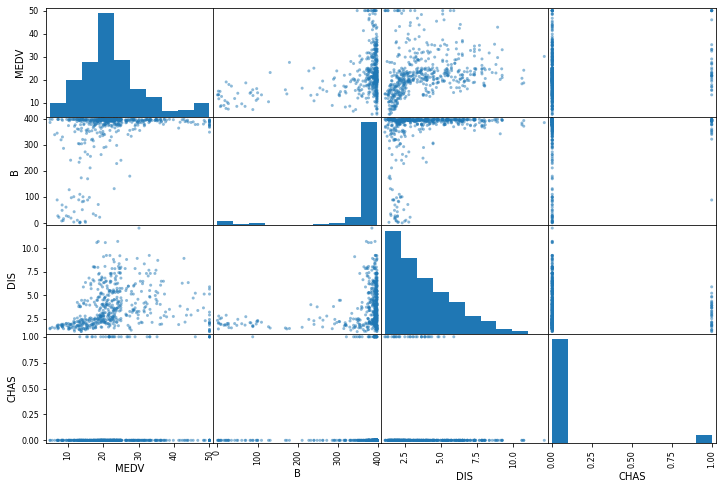

In [35]:
scatter_matrix(data[['MEDV', 'B', 'DIS', 'CHAS']], figsize=(12, 8));

Судя по коэф. корреляции и графикам, наиболее выраженная зависимость с целевой переменной наблюдается у признаков: LSTAT, RM, NOX, CRIM, AGE, DIS - по умолчанию будем использовать их  

In [45]:
# Признаки в порядке убывания их важности (первые 6 - исходя из графиков, остальные - по корреляциям):

feat_imp = ['LSTAT', 'RM', 'NOX', 'CRIM', 'AGE', 'DIS', 'PTRATIO', 'INDUS', 'TAX', 'RAD', 'ZN', 'B', 'CHAS']

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttributesSelector(BaseEstimator, TransformerMixin):
    def __init__(self, features, num_attr=6):
        self.num_attr = num_attr
        self.features = features
    def fit(self, X, y=None):
        return self 
    def transform(self, X):
        return X[self.features[:self.num_attr]]

In [4]:
X, y = data.iloc[:,:-1], data['MEDV']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [53]:
lin_reg_pipe = Pipeline([('selector', AttributesSelector(feat_imp, 6)),
                         ('scaler', StandardScaler()),
                         ('clf', LinearRegression())])

param_grid = {'selector__num_attr': [6, 8, 10, len(feat_imp)],
              'scaler': [StandardScaler(), MinMaxScaler()]}

lin_reg_grid = GridSearchCV(lin_reg_pipe, param_grid, scoring='neg_mean_squared_error', cv=5)

lin_reg_grid.fit(X_train, y_train)

cvres = lin_reg_grid.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5.382999383220936 {'scaler': StandardScaler(), 'selector__num_attr': 6}
5.063819770499242 {'scaler': StandardScaler(), 'selector__num_attr': 8}
5.020200532060795 {'scaler': StandardScaler(), 'selector__num_attr': 10}
4.9059868617377065 {'scaler': StandardScaler(), 'selector__num_attr': 13}
5.382999383220935 {'scaler': MinMaxScaler(), 'selector__num_attr': 6}
5.063819770499242 {'scaler': MinMaxScaler(), 'selector__num_attr': 8}
5.020200532060796 {'scaler': MinMaxScaler(), 'selector__num_attr': 10}
4.905986861737705 {'scaler': MinMaxScaler(), 'selector__num_attr': 13}


In [54]:
np.sqrt(-lin_reg_grid.best_score_), lin_reg_grid.best_estimator_

(4.905986861737705,
 Pipeline(steps=[('selector',
                  AttributesSelector(features=['LSTAT', 'RM', 'NOX', 'CRIM',
                                               'AGE', 'DIS', 'PTRATIO', 'INDUS',
                                               'TAX', 'RAD', 'ZN', 'B', 'CHAS'],
                                     num_attr=13)),
                 ('scaler', MinMaxScaler()), ('clf', LinearRegression())]))

Определение значимости признаков по дереву регрессии

In [61]:
X_train_scaled = StandardScaler().fit_transform(X_train)
tree_clf = DecisionTreeRegressor(random_state=42).fit(X_train_scaled, y_train)

sorted(zip(tree_clf.feature_importances_, X.columns), reverse=True)

[(0.6010554641910085, 'RM'),
 (0.18928466592393248, 'LSTAT'),
 (0.06855646202040581, 'DIS'),
 (0.05312728315606885, 'CRIM'),
 (0.028790603280407355, 'NOX'),
 (0.014957391207205422, 'AGE'),
 (0.010933184291785598, 'PTRATIO'),
 (0.010812787938187157, 'B'),
 (0.010722998505783031, 'TAX'),
 (0.00793211390412265, 'INDUS'),
 (0.002505075361979136, 'RAD'),
 (0.0009985139111567554, 'ZN'),
 (0.00032345630795725325, 'CHAS')]

Интересно, что у дерева регрессии значимость признаков оказалась примерно такой же, как и были сделаны первоначальные выводы по графикам и коэф. корреляции (в шестерку наиболее значимых признаков вошли одни и те же, немного поменялся порядок). Используем данную сортировку признаков при их отборе в дальнейших моделях.

In [63]:
feat_imp_tree = [feat[1] for feat in sorted(zip(tree_clf.feature_importances_, X.columns), reverse=True)]

In [67]:
tree_reg_pipe = Pipeline([('selector', AttributesSelector(feat_imp_tree, 6)),
                         ('scaler', StandardScaler()),
                         ('clf', DecisionTreeRegressor(random_state=42))])

param_grid = {'selector__num_attr': [6, 8, 10, len(feat_imp_tree)],
              'scaler': [StandardScaler(), MinMaxScaler()]}

tree_reg_grid = GridSearchCV(tree_reg_pipe, param_grid, scoring='neg_mean_squared_error', cv=5)

tree_reg_grid.fit(X_train, y_train)

cvres = tree_reg_grid.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


5.700656362216364 {'scaler': StandardScaler(), 'selector__num_attr': 6}
5.585377667366332 {'scaler': StandardScaler(), 'selector__num_attr': 8}
5.5748278260848645 {'scaler': StandardScaler(), 'selector__num_attr': 10}
5.918773952622243 {'scaler': StandardScaler(), 'selector__num_attr': 13}
5.700656362216364 {'scaler': MinMaxScaler(), 'selector__num_attr': 6}
5.585377667366332 {'scaler': MinMaxScaler(), 'selector__num_attr': 8}
5.5748278260848645 {'scaler': MinMaxScaler(), 'selector__num_attr': 10}
5.918938626926971 {'scaler': MinMaxScaler(), 'selector__num_attr': 13}


In [68]:
np.sqrt(-tree_reg_grid.best_score_), tree_reg_grid.best_estimator_

(5.5748278260848645,
 Pipeline(steps=[('selector',
                  AttributesSelector(features=['RM', 'LSTAT', 'DIS', 'CRIM',
                                               'NOX', 'AGE', 'PTRATIO', 'B',
                                               'TAX', 'INDUS', 'RAD', 'ZN',
                                               'CHAS'],
                                     num_attr=10)),
                 ('scaler', StandardScaler()),
                 ('clf', DecisionTreeRegressor(random_state=42))]))

In [73]:
for_reg_pipe = Pipeline([('selector', AttributesSelector(feat_imp_tree, 6)),
                         ('scaler', StandardScaler()),
                         ('clf', RandomForestRegressor(random_state=42))])

param_grid = {'selector__num_attr': [6, 8, 10, len(feat_imp_tree)],
              'scaler': [StandardScaler(), MinMaxScaler()],
              'clf__bootstrap': [True, False],
              'clf__n_estimators': [100, 125, 150],
              'clf__max_features': ["auto", "sqrt", "log2"]}

for_reg_grid = GridSearchCV(for_reg_pipe, param_grid, scoring='neg_mean_squared_error', cv=5)

for_reg_grid.fit(X_train, y_train)

np.sqrt(-for_reg_grid.best_score_), for_reg_grid.best_estimator_

(3.3513758395572673,
 Pipeline(steps=[('selector',
                  AttributesSelector(features=['RM', 'LSTAT', 'DIS', 'CRIM',
                                               'NOX', 'AGE', 'PTRATIO', 'B',
                                               'TAX', 'INDUS', 'RAD', 'ZN',
                                               'CHAS'],
                                     num_attr=10)),
                 ('scaler', StandardScaler()),
                 ('clf',
                  RandomForestRegressor(bootstrap=False, max_features='sqrt',
                                        n_estimators=125, random_state=42))]))

Проверка моделей на тестовых данных

In [77]:
forest = for_reg_grid.best_estimator_.fit(X_train, y_train)
linear = lin_reg_grid.best_estimator_.fit(X_train, y_train)
tree = tree_reg_grid.best_estimator_.fit(X_train, y_train)

print('Показатель RMSE по трем моделям с лучшими гиперпараметрами:',
      'RandomForest - {}'.format(mean_squared_error(y_test, forest.predict(X_test), squared=False)),
      'LinearRegression - {}'.format(mean_squared_error(y_test, linear.predict(X_test), squared=False)),
      'TreeRegressor - {}'.format(mean_squared_error(y_test, tree.predict(X_test), squared=False)),
     sep='\n')

Показатель RMSE по трем моделям с лучшими гиперпараметрами:
RandomForest - 3.088008693548087
LinearRegression - 4.801658689880409
TreeRegressor - 3.551609293183665


Наилучшее значение на тестовых данных, как и было при настройке на тренировочных, у RandomForest, однако модель линейной регрессии на тестовых данных показала себя хуже, чем дерево регрессии, хотя на тренировочных было наоборот.

In [7]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

np.sqrt(-cross_val_score(ElasticNet(l1_ratio=0.5), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean())

5.530121986636783

In [27]:
from sklearn.linear_model import Ridge
np.sqrt(-cross_val_score(Ridge(), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean())

4.904698470478271

In [28]:
from sklearn.linear_model import Lasso
np.sqrt(-cross_val_score(Lasso(), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean())

5.436154856503475

In [51]:
a = 0.01

for clf in (ElasticNet(a), Ridge(a), Lasso(a)):
    clf.fit(X_train_scaled, y_train)
    print(clf, mean_squared_error(y_test, clf.predict(scaler.transform(X_test)), squared=False), sep='\n')

ElasticNet(alpha=0.01)
4.809381411555218
Ridge(alpha=0.01)
4.801684948975224
Lasso(alpha=0.01)
4.806688846579177
